<a href="https://colab.research.google.com/github/Saniaa2715/DSDBA/blob/main/Ass_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
social=pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
social.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
social.shape

(400, 5)

In [8]:
social.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [9]:
social.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [10]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [13]:
social.drop("Gender", axis=1, inplace=True)

In [15]:
# Defining X and Y

X= social.drop("Purchased" ,axis=1)
y=social["Purchased"]

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.93657932, -1.78179743, -1.49004624],
       [ 1.66838653, -0.25358736, -1.46068138],
       [-0.32087714, -1.11320552, -0.78528968],
       ...,
       [-0.52039175,  1.17910958, -1.46068138],
       [ 0.88695546, -0.15807423, -1.07893824],
       [-1.36231017,  1.08359645, -0.99084367]])

In [23]:
#Splitting the dataset in training and testing model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X train : ", X_train.shape)
print("X test : ", X_test.shape)
print("y train : ", y_train.shape)
print("y test : ", y_test.shape)

X train :  (280, 3)
X test :  (120, 3)
y train :  (280,)
y test :  (120,)


In [24]:
# Implementing Logistic Regression

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [25]:
print("The predictions are: ")
y_pred=model.predict(X_test)
y_pred

The predictions are: 


array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [26]:
res = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
res.head()

,Actual,Predicted
209,0,0
280,1,1
33,0,0
210,1,1
93,0,0


In [27]:
# Computing Confusion Matrix

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[71,  2],
       [16, 31]])

Text(0.5, 23.52222222222222, 'Predicted')

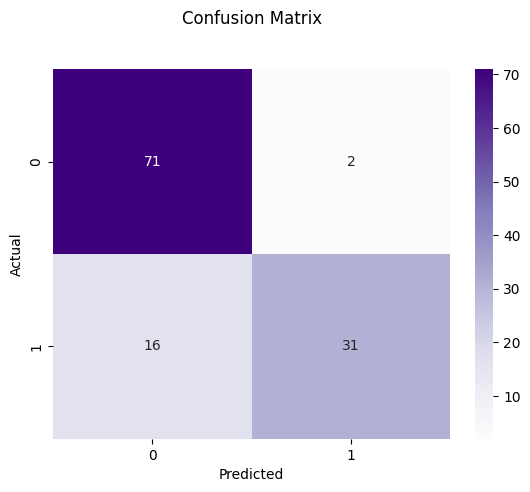

In [31]:

sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap = "Purples",fmt='g')
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()
print("\nTrue Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)


True Positives (TP): 31
False Positives (FP): 2
True Negatives (TN): 71
False Negatives (FN): 16


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
# Computing Accuracy

accuracy=accuracy_score(y_test, y_pred)
print("The Accuracy is : ", accuracy)

The Accuracy is :  0.85


In [35]:
# Computing Error Rate

error_rate= 1- accuracy
print("The Error rate is: ", error_rate)

The Error rate is:  0.15000000000000002


In [36]:
# Computing Precision

precision= precision_score(y_test, y_pred)
print("The Precision is: ", precision)

The Precision is:  0.9393939393939394


In [37]:
# Computing Recall

recall= recall_score(y_test, y_pred)
print("The Recall is: ", recall)

The Recall is:  0.6595744680851063


In [38]:
# Computing F1_score

F1_score=f1_score(y_test, y_pred)
print("The F1 score is: ", F1_score)

The F1 score is:  0.775
